In [4]:
from matplotlib import pyplot
from matplotlib.image import imread
import os
import scipy

In [5]:
Train_folder_cat = 'C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/Include/Dataset_home/train/cats'
Train_folder_dog = 'C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/Include/Dataset_home/train/dogs'
test_folder_cat = 'C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/Include/Dataset_home/test/cats'
test_folder_dog = 'C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/Include/Dataset_home/test/dogs'

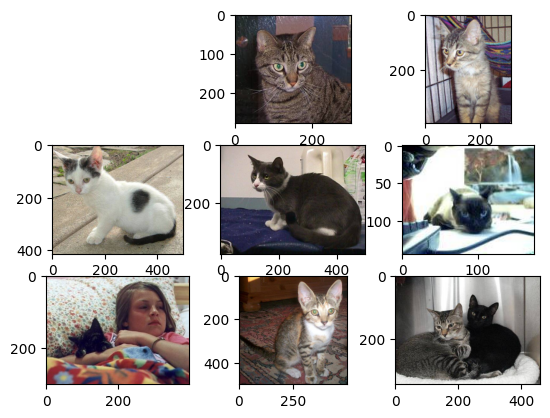

In [6]:
for i in range(1,9):
    pyplot.subplot(330 + 1 + i)
    file_name = Train_folder_cat + '/cat.' + str(i) + '.jpg'
    image = imread(file_name)
    pyplot.imshow(image)
pyplot.show()

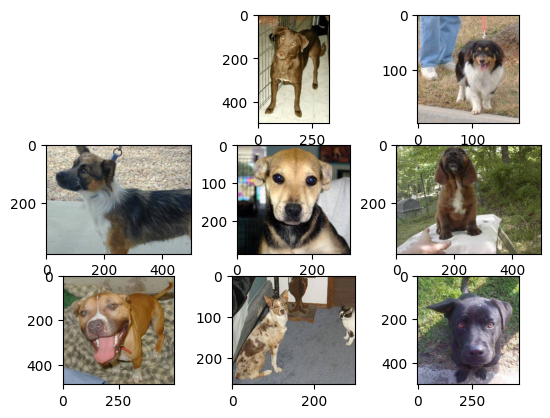

In [7]:
for i in range(1,9):
    pyplot.subplot(330 + 1 + i)
    file_name = Train_folder_dog + '/dog.' + str(i) + '.jpg'
    image = imread(file_name)
    pyplot.imshow(image)
pyplot.show()

In [ ]:
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [ ]:
photos, labels = list(), list()
for file_name in os.listdir(Train_folder_cat):
    output = 0.0
    if file_name.startswith('cat'):
        output = 1.0
    input_path = os.path.join(Train_folder_cat, file_name)
    photo = load_img(input_path, target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('cat_photos.npy', photos)
save('cat_labels', labels)

In [ ]:
photos, labels = list(), list()
for file_name in os.listdir(Train_folder_dog):
    output = 0.0
    if file_name.startswith('dog'):
        output = 1.0
    input_path = os.path.join(Train_folder_dog, file_name)
    #print(input_path)
    photo = load_img(input_path, target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('dog_photos.npy', photos)
save('dog_labels.npy', labels)

C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/Include/Dataset_home/train/dogs\dog.1.jpg
C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/Include/Dataset_home/train/dogs\dog.10.jpg
C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/Include/Dataset_home/train/dogs\dog.100.jpg
C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/Include/Dataset_home/train/dogs\dog.1000.jpg
C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/Include/Dataset_home/train/dogs\dog.1001.jpg
C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/Include/Dataset_home/train/dogs\dog.1002.jpg
C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/Include/Dataset_home/train/dogs\dog.1003.jpg
C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/Include/Dataset_home/train/dogs\dog.1004.jpg
C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/Include/Dataset_home/train/dogs\dog.1005.jpg
C:/Users/Artophi

In [ ]:
#Baseline Convolutional neural network model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.optimizers import SGD
from scipy import ndimage

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
model = define_model()

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_it = datagen.flow_from_directory('C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/Include/Dataset_home/train',class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory('C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/Include/Dataset_home/test',class_mode='binary', batch_size=64, target_size=(200, 200))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
model = define_model()
history = model.fit(train_it, epochs=20, validation_data=test_it)



Epoch 1/20


126/126 [==============================] - 87s 679ms/step - loss: 5.5894 - accuracy: 0.5684 - val_loss: 0.6330 - val_accuracy: 0.6431
Epoch 2/20
126/126 [==============================] - 83s 657ms/step - loss: 0.7089 - accuracy: 0.6463 - val_loss: 0.6270 - val_accuracy: 0.6747
Epoch 3/20
126/126 [==============================] - 82s 648ms/step - loss: 0.5444 - accuracy: 0.7299 - val_loss: 0.6303 - val_accuracy: 0.6861
Epoch 4/20
126/126 [==============================] - 83s 656ms/step - loss: 0.4492 - accuracy: 0.7933 - val_loss: 0.6153 - val_accuracy: 0.6990
Epoch 5/20
126/126 [==============================] - 83s 655ms/step - loss: 0.3531 - accuracy: 0.8430 - val_loss: 0.6374 - val_accuracy: 0.7093
Epoch 6/20
126/126 [==============================] - 83s 659ms/step - loss: 0.3204 - accuracy: 0.8656 - val_loss: 0.7891 - val_accuracy: 0.6574
Epoch 7/20
126/126 [==============================] - 83s 660ms/step - loss: 0.2594 - accuracy: 0.8924 - val_loss: 0.6398 - va

In [ ]:
model.save('cat_dog_classifier.h5')

c:\Users\Artophilic\projects\CatAndDogImageClassification\myvenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
print(acc)

C:\Users\Artophilic\AppData\Local\Temp\ipykernel_21176\1461333324.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)


> 71.132
0.7113198041915894


In [ ]:
import sys
import matplotlib.pyplot as plt
acc = 0.7113198041915894
def summarize_diagnostics(history):
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue',label='train')
    plt.plot(history.history['val_loss'], color='orange',label='test')

    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['acc'], color='blue', label='test')
    plt.plot(history,history['val_acc'], color='orange',label='test')

    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    plt.close()

summarize_diagnostics(history)

In [11]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model


In [34]:
import tensorflow as tf
def load_image(fileName):
    img = load_img(fileName, target_size=(200,200))
    img = img_to_array(img)
    img = img.reshape(1, 200, 200, 3)
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

def run_example(fileName):
    img = load_image(fileName)
    model = tf.keras.models.load_model('cat_dog_classifier.h5')
    result = model.predict(img)
    print(result[0][0])

a = run_example('C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/sample_image.jpg')
b = run_example('C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/Include/Dataset_home/test/cats/cat.4048.jpg')
#c = run_example('C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/Include/Dataset_home/test/cats/cat.4007.jpg')

#d = run_example('C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/Include/Dataset_home/train/dogs/dog.560.jpg')

#e = run_example('C:/Users/Artophilic/projects/CatAndDogImageClassification/myvenv/img5.jpg')

1/1 [==============================] - 0s 96ms/step
1.0
1/1 [==============================] - 0s 76ms/step
0.0
